In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# This makes sure charts appear right inside the notebook
%matplotlib inline 

# Load the data
train = pd.read_csv('train.csv')

# Show the first 5 rows to check if it worked
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [2]:
# Convert text dates to Python dates
train['release_date'] = pd.to_datetime(train['release_date'])

# Extract useful info into new columns
train['release_month'] = train['release_date'].dt.month
train['release_year'] = train['release_date'].dt.year
train['release_weekday'] = train['release_date'].dt.weekday

# Fix the "Future Year" bug (pandas sometimes reads '98 as 2098 instead of 1998)
train['release_year'] = train['release_year'].apply(lambda x: x if x < 2018 else x - 100)

print("Dates cleaned and ready!")

C:\Users\user\AppData\Local\Temp\ipykernel_46604\3097622022.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train['release_date'] = pd.to_datetime(train['release_date'])


Dates cleaned and ready!


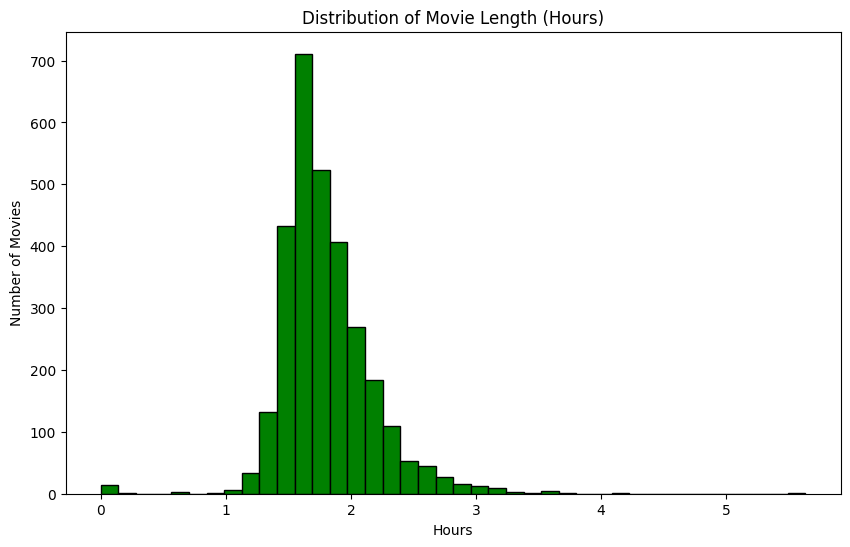

In [3]:
# Create a canvas for the plot (10 inches wide, 6 inches tall)
plt.figure(figsize=(10,6))

# Create the histogram
# We divide by 60 to convert "Minutes" into "Hours"
# .fillna(0) fixes any empty data points so the code doesn't crash
plt.hist(train['runtime'].fillna(0) / 60, bins=40, color='green', edgecolor='black')

# Add labels so we know what we are looking at
plt.title('Distribution of Movie Length (Hours)')
plt.xlabel('Hours')
plt.ylabel('Number of Movies')

# Display the chart
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_46604\879099456.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train['release_year'].sort_values(), palette="Dark2", edgecolor="black")


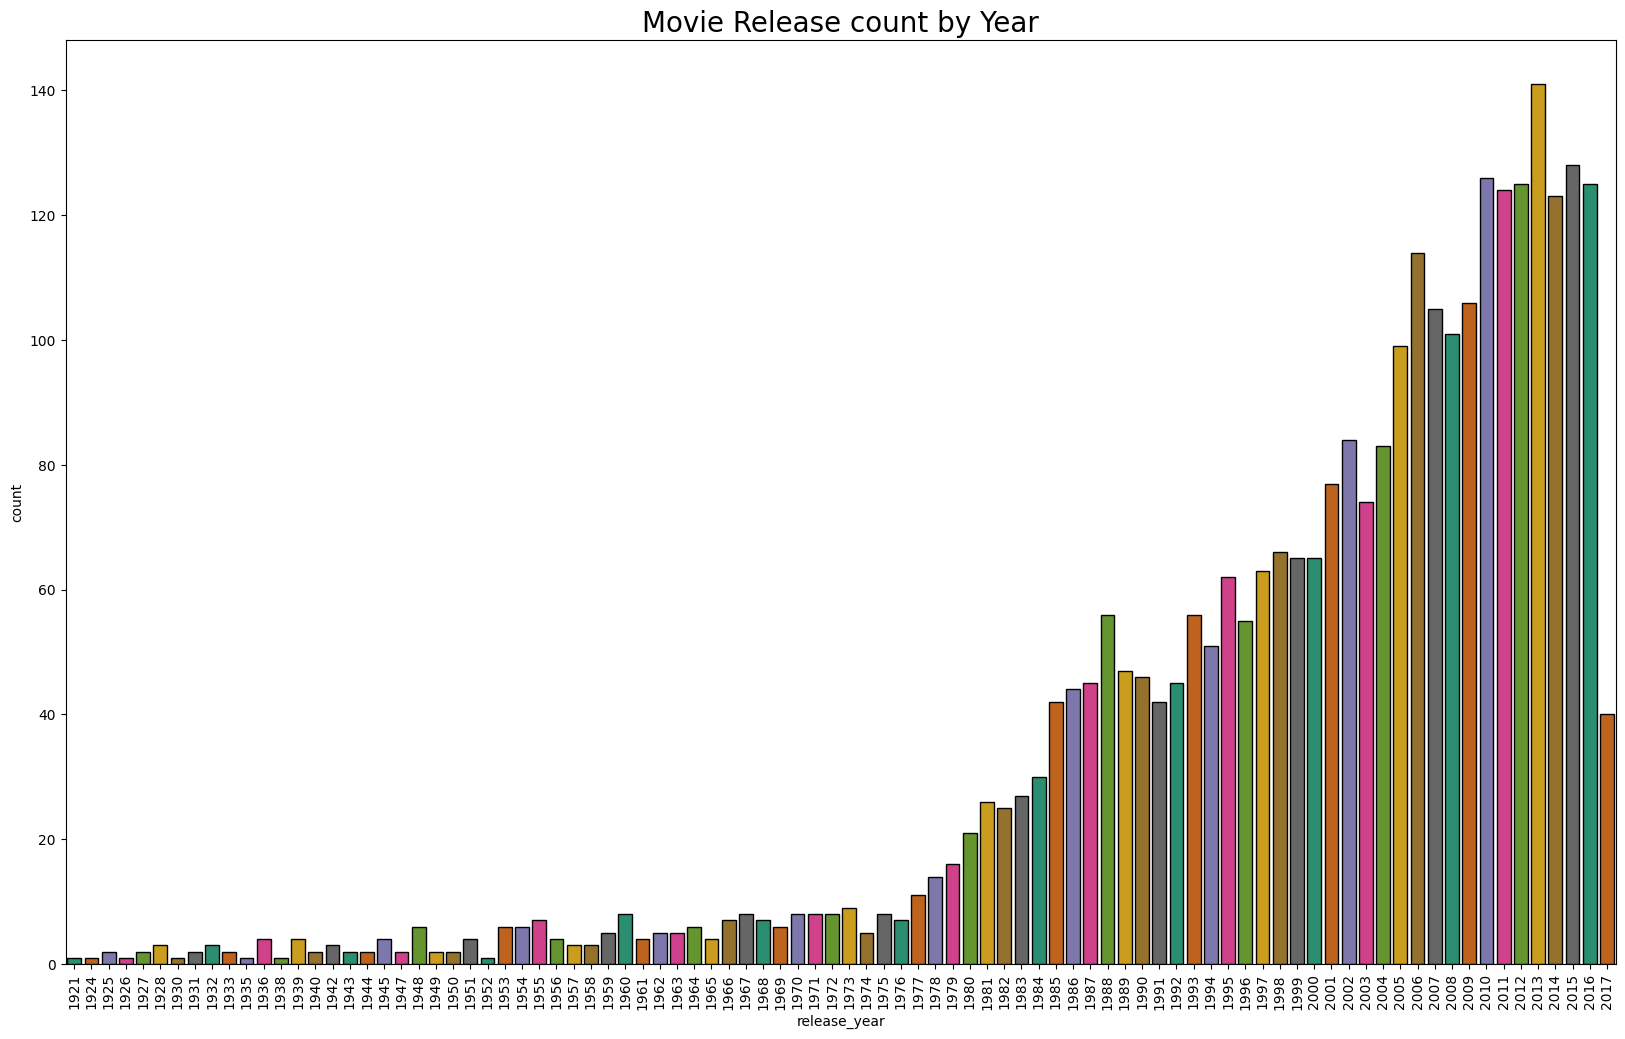

In [4]:
# Set the size of the chart (20 inches wide, 12 inches tall - it's big!)
plt.figure(figsize=(20,12))

# Create a Count Plot using Seaborn (sns)
# We sort the years so the timeline goes from left to right correctly
sns.countplot(x=train['release_year'].sort_values(), palette="Dark2", edgecolor="black")

# Add titles
plt.title("Movie Release count by Year", fontsize=20)
plt.xticks(rotation=90) # Rotate the year labels 90 degrees so they don't overlap

# Show it
plt.show()

In [5]:
# Sort the data by 'budget' in Descending order (Highest to Lowest)
# .head(1) means "Just give me the top 1 result"
expensive_movie = train[['title', 'budget']].sort_values('budget', ascending=False).head(1)

print(expensive_movie)

                                            title     budget
2135  Pirates of the Caribbean: On Stranger Tides  380000000


In [6]:
# Sort by 'revenue' (Money earned) in Descending order
rich_movie = train[['title', 'revenue']].sort_values('revenue', ascending=False).head(1)

print(rich_movie)

             title     revenue
1126  The Avengers  1519557910
